# Neural Network
A Neural Network is essentially a network of mathematical equations. It takes one or more input variables, and by going through a network of equations, results in one or more output variables. You can also say that a neural network takes in a vector of inputs and returns a vector of outputs. A **deep (feedforward) neural network** refers to a neural network that contains not only the input and output layers, but also hidden layers in between

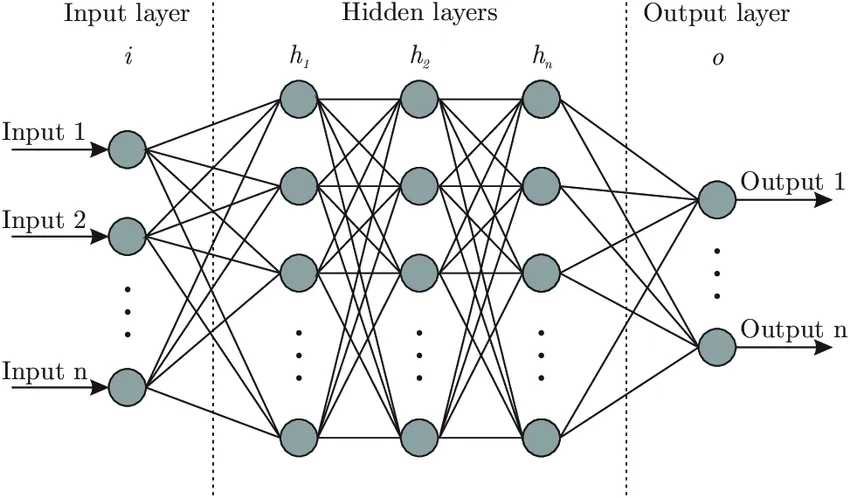

It is composed of four principal objects:

- Layers: all the learning occurs in the layers. There are 3 layers 1) Input 2) Hidden and 3) Output
- feature and label: Input data to the network (features) and output from the network (labels)
- loss function: Metric used to estimate the performance of the learning phase
- optimizer: Improve the learning by updating the knowledge (weights and bias) in the network

A **neural network unit (neuron)** is a primitive neural network that consists of only the “input layer", and an output layer with only one output. It is represented pictorially as follows:

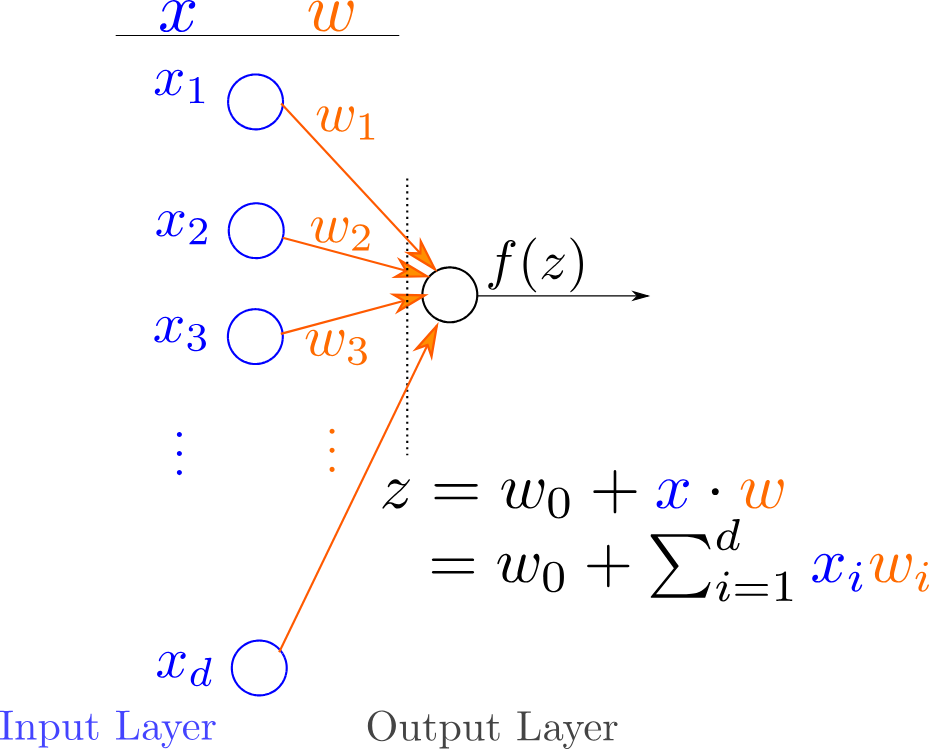

A neural network unit computes a non-linear weighted combination of its input:

$$
\displaystyle  \displaystyle \hat{y} = \displaystyle  f(z)\quad \text {where } z= w_0 + \sum _{i=1}^ d x_ i w_ i
$$

where $w_i$ are numbers called weights , $z$ is a number and is the weighted sum of the inputs $x_i$ and $f$ is generally a non-linear function called the **activation function**. Weights are used to connect each neuron in one layer to every neuron in the next layer. Weight determines the strength of the connection between the neurons.


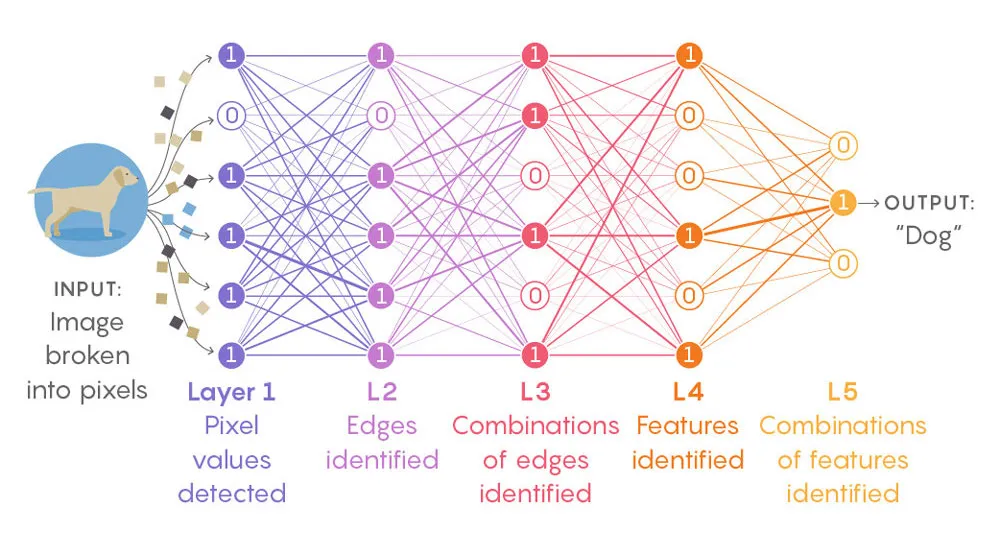

## Embeddings

Word vectors, or word embeddings, are numerical representations of words in multidimensional space through matrices. The purpose of the word vector is to get a computer system to understand a word. Computers cannot understand text efficiently. They can, however, process numbers quickly and well. For this reason, it is important to convert a word into a number.

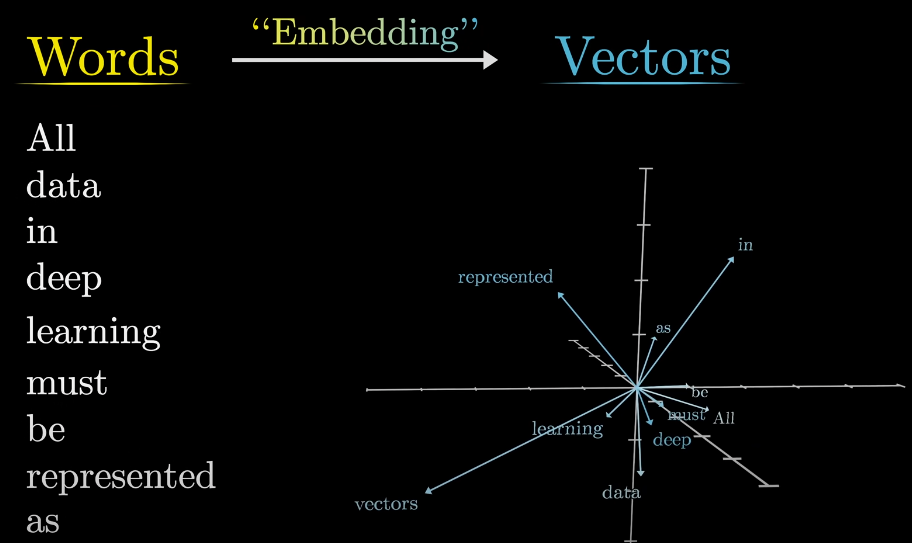

This code will load pre-trained word embeddings, reduce their dimensionality to 3 using PCA, and plot them in a 3D space using matplotlib.

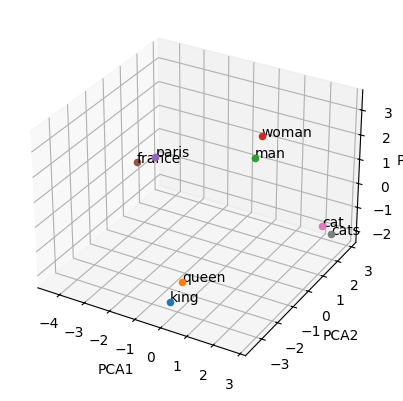

In [8]:
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load pre-trained Word2Vec model
model = api.load("glove-wiki-gigaword-100")  # or use "word2vec-google-news-300" or glove-wiki-gigaword-50

# List of words to visualize
words = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'cat', 'cats']

# Get word vectors
word_vectors = [model[word] for word in words]

# Reduce dimensions to 3 using PCA
pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(word_vectors)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for word, vec in zip(words, reduced_vectors):
    ax.scatter(vec[0], vec[1], vec[2])
    ax.text(vec[0], vec[1], vec[2], word)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()

#### Plurals are in the same direction
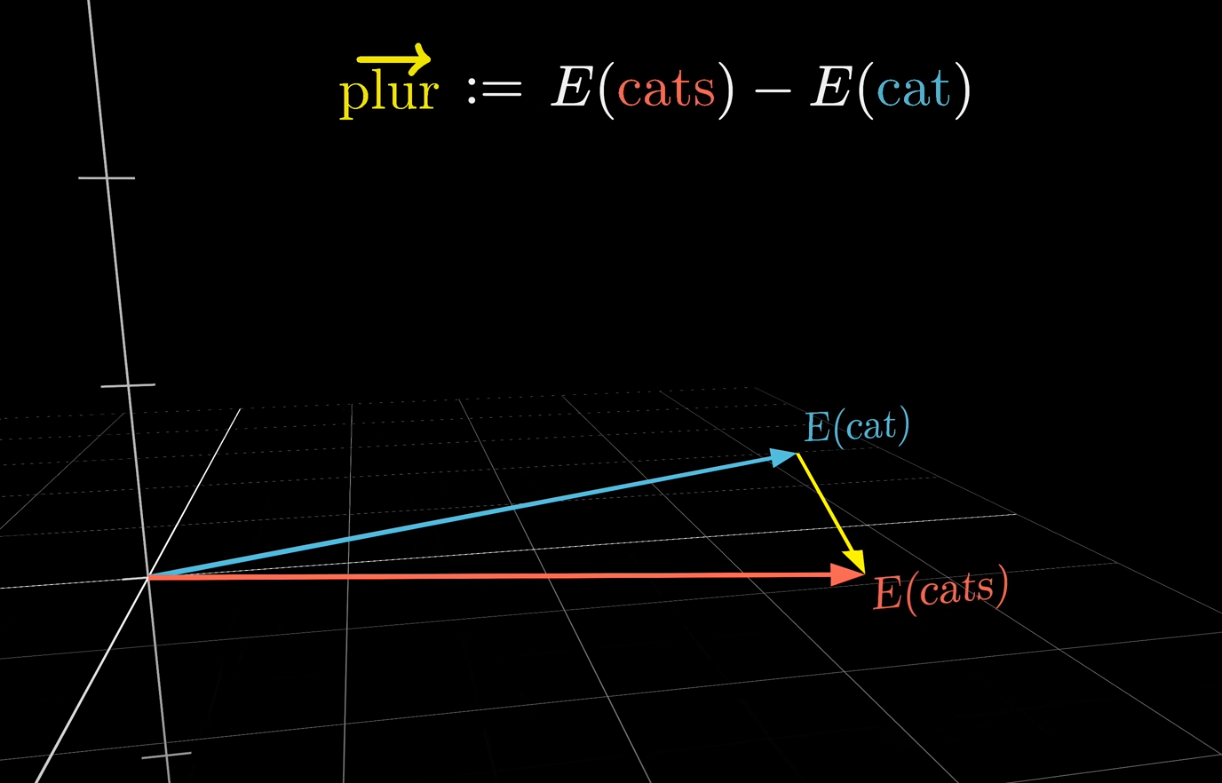

#### Words with relationship or similarity (same direction and closer to each other)
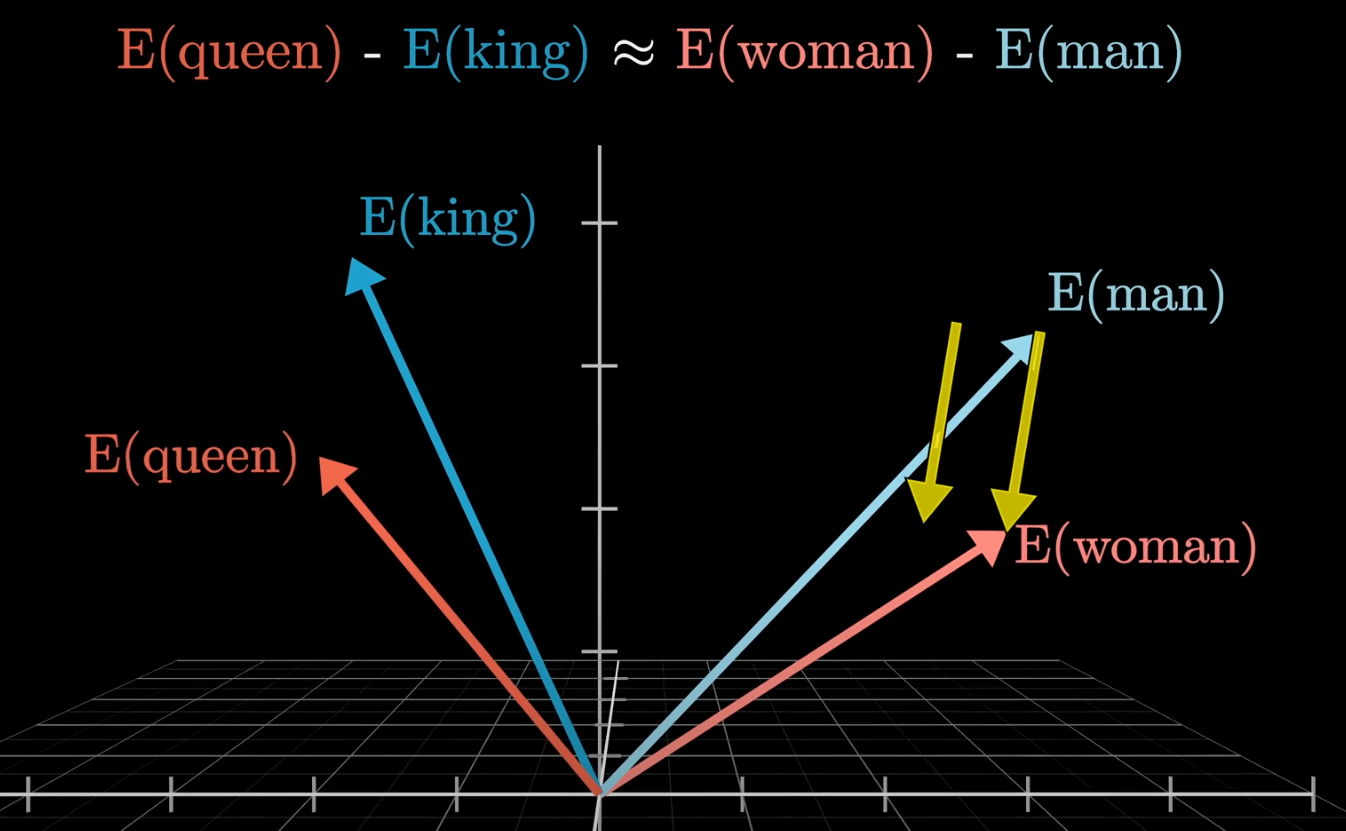



### Dot products and Similarity
Dot products of two vectors help to identify how well they align. Geometrically the dot product is 
$+ve$ if the vector points in same direction (plurals, king-queen etc), $0$ when they are perpendicular and $-ve$ when they are opposite

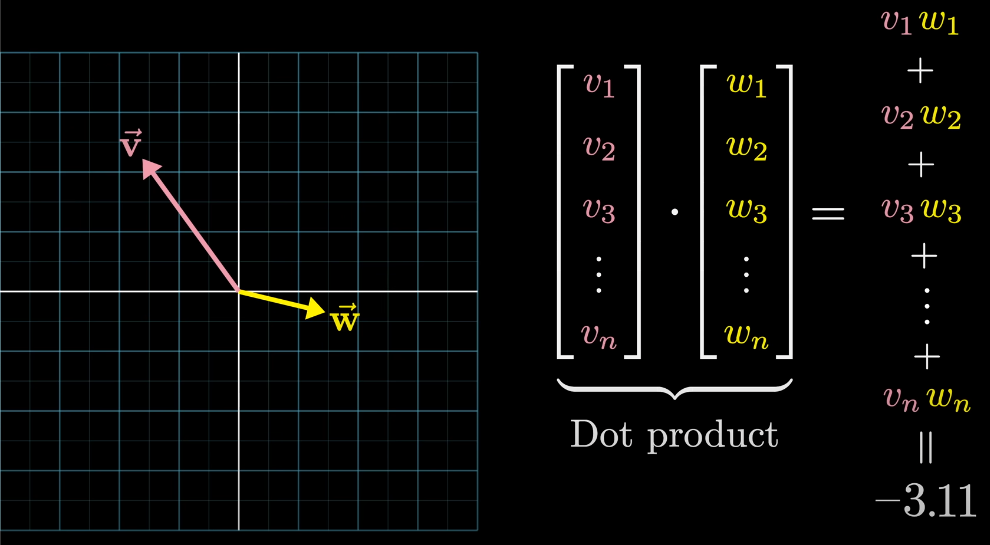

The highest weighted sum dot(c,c) is between vectors that are exactly identical. In contrast, because a and b have no overlapping weight, their dot product is zero. features in b and e seems opposite to each other.

In [59]:
import numpy as np

a = [ 0, 1, 0, 1]
b = [ 1, 0, 1, 0]
c = [ 0, 1, 1, 0]
d = [.5, 0,.5, 0]
e = [ 0, 1,-1, 0]

print(f"a.b  = {np.dot(a,b)}")
print(f"b.c  = {np.dot(b,c)}")
print(f"b.d  = {np.dot(b,d)}")
print(f"c.c  = {np.dot(c,c)}")
print(f"b.e  = {np.dot(b,e)}")

a.b  = 0
b.c  = 1
b.d  = 1.0
c.c  = 2
b.e  = -1


##### Cosine similarity

Given two n-dimensional vectors of attributes, A and B, the cosine similarity, cos(θ), is represented using a dot product. The resulting similarity ranges from -1 meaning exactly opposite, to 1 meaning exactly the same, with 0 indicating orthogonality or decorrelation, while in-between values indicate intermediate similarity or dissimilarity.

$$
 cos(\theta) = \frac {A \cdot B}{||A||.||B||}
$$

Lets use a pre-trained Word to Vector model `glove-wiki-gigaword-50` and find out similarities between various words using Cosine Similarity

In [81]:
import gensim.downloader as api

def cosine_similarity(vec_a, vec_b):
    """
    Calculate the cosine similarity between two vectors.
    
    Args:
    - vec_a: A numpy array representing the first vector.
    - vec_b: A numpy array representing the second vector.
    
    Returns:
    - Cosine similarity as a float.
    """
    dot_product = np.dot(vec_a, vec_b)
    norm_a = np.linalg.norm(vec_a)
    norm_b = np.linalg.norm(vec_b)
    return dot_product / (norm_a * norm_b)

# Load pre-trained Word2Vec model
model = api.load("glove-wiki-gigaword-50")

# List of words to visualize
words = ['king', 'queen', 'man', 'woman', 'paris', 'france', 'cat', 'cats', 'angry', 'happy']

# Get word vectors
word_vectors = [model[word] for word in words]

embeddings = dict(zip(words, word_vectors))

king_king = cosine_similarity(embeddings["king"], embeddings["king"])
king_queen = cosine_similarity(embeddings["king"], embeddings["queen"])
king_cat = cosine_similarity(embeddings["king"], embeddings["cat"])
king_man = cosine_similarity(embeddings["king"], embeddings["man"])
king_woman = cosine_similarity(embeddings["king"], embeddings["woman"])
king_paris = cosine_similarity(embeddings["king"], embeddings["paris"])
france_paris = cosine_similarity(embeddings["france"], embeddings["paris"])
cat_cats = cosine_similarity(embeddings["cat"], embeddings["cats"])
angry_happy = cosine_similarity(embeddings["angry"], embeddings["happy"])

print("King vector: ", embeddings["king"])
print(f"Cosine similarity between king_king: ", king_king)
print(f"Cosine similarity between king_queen: ", king_queen)
print(f"Cosine similarity between king_cat: ", king_cat)
print(f"Cosine similarity between king_man: ", king_man)
print(f"Cosine similarity between king_woman: ", king_woman)
print(f"Cosine similarity between king_paris: ", king_paris)
print(f"Cosine similarity between france_paris: ", france_paris)
print(f"Cosine similarity between cat_cats: ", cat_cats)
print(f"Cosine similarity between angry happy: ", angry_happy)

King vector:  [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]
Cosine similarity between king_king:  1.0
Cosine similarity between king_queen:  0.7839044
Cosine similarity between king_cat:  0.38628823
Cosine similarity between king_man:  0.5309377
Cosine similarity between king_woman:  0.41133782
Cosine similarity between king_paris:  0.30651847
Cosine similarity between france_paris:  0.8025329
Cosine similarity between cat_cats:  0.78652704
Cosine similarity between angry happy:  0.5709519
